# Estadísticas Discriminadas por AMPARO

Este notebook realiza un análisis detallado de las estadísticas de siniestralidad discriminadas por tipo de AMPARO.

## Contenido:
1. Carga de datos
2. Estadísticas generales por AMPARO
3. Métricas de siniestralidad por AMPARO
4. Análisis temporal por AMPARO
5. Análisis geográfico por AMPARO
6. Comparativa entre producción y siniestros
7. Visualizaciones avanzadas

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

# Configuración de pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

## 1. Carga de Datos

In [2]:
# Cargar datos
print("Cargando datos...")
df_prod = pd.read_csv('../ProdCumpli.csv')
df_sinies = pd.read_csv('../SiniesCumpli.csv')

print(f"\n✓ ProdCumpli: {df_prod.shape[0]:,} registros")
print(f"✓ SiniesCumpli: {df_sinies.shape[0]:,} registros")

Cargando datos...

✓ ProdCumpli: 1,242,477 registros
✓ SiniesCumpli: 202,984 registros


In [3]:
# Convertir fechas a datetime
df_sinies['FECHA_DE_SINIESTRO'] = pd.to_datetime(df_sinies['FECHA_DE_SINIESTRO'], format='%d/%m/%Y', errors='coerce')
df_sinies['FECHA_AVISO'] = pd.to_datetime(df_sinies['FECHA_AVISO'], format='%d/%m/%Y', errors='coerce')
df_sinies['ULT_FECHA_PAGO'] = pd.to_datetime(df_sinies['ULT_FECHA_PAGO'], format='%d/%m/%Y', errors='coerce')

print("✓ Fechas convertidas a formato datetime")

✓ Fechas convertidas a formato datetime


## 2. Estadísticas Generales por AMPARO

In [4]:
print("="*80)
print("ESTADÍSTICAS GENERALES POR AMPARO")
print("="*80)

# Agrupar por AMPARO y calcular estadísticas
stats_amparo = df_sinies.groupby('AMPARO').agg({
    'SINIESTRO': 'count',
    'POLIZA': 'nunique',
    'VALOR_ASEGURADO': ['sum', 'mean', 'median', 'std'],
    'PAGOS': ['sum', 'mean', 'median', 'std', lambda x: (x > 0).sum()],
    'RESERVA_ACTUAL_EQUI': ['sum', 'mean', 'median']
}).round(2)

# Renombrar columnas
stats_amparo.columns = [
    'Num_Siniestros', 'Polizas_Afectadas',
    'Valor_Aseg_Total', 'Valor_Aseg_Promedio', 'Valor_Aseg_Mediana', 'Valor_Aseg_StdDev',
    'Pagos_Total', 'Pagos_Promedio', 'Pagos_Mediana', 'Pagos_StdDev', 'Siniestros_Con_Pago',
    'Reserva_Total', 'Reserva_Promedio', 'Reserva_Mediana'
]

# Ordenar por número de siniestros
stats_amparo = stats_amparo.sort_values('Num_Siniestros', ascending=False)

print("\nEstadísticas completas por tipo de AMPARO:\n")
display(stats_amparo)

ESTADÍSTICAS GENERALES POR AMPARO

Estadísticas completas por tipo de AMPARO:



,Num_Siniestros,Polizas_Afectadas,Valor_Aseg_Total,Valor_Aseg_Promedio,Valor_Aseg_Mediana,Valor_Aseg_StdDev,Pagos_Total,Pagos_Promedio,Pagos_Mediana,Pagos_StdDev,Siniestros_Con_Pago,Reserva_Total,Reserva_Promedio,Reserva_Mediana
AMPARO,,,,,,,,,,,,,,
CUMPLIMIENTO,93145,3745,234498726871352.41,2578354098.14,121148909.00,8711077324.29,137242463687.49,1473428.14,0.00,74658991.17,5261,5522259758062.10,59286700.93,3995000.00
PRESTACIONES SOCIALES,51864,540,240272018366279.38,4728181875.48,1613810918.90,7261492231.66,15164863750.13,292396.73,0.00,10290252.66,3068,1005365722479.97,19384654.53,8461670.40
DISPOSICIONES LEGALES,32511,238,38968373920360.52,1220011080.44,1161241456.00,1458611847.62,7112298209.92,218765.90,0.00,13056501.99,188,958595793443.01,29485275.55,4687000.00
BUEN MANEJO DEL ANTICIPO,13701,731,21649612221099.02,1616487136.65,100000000.00,7187898491.34,63372943558.07,4625424.68,0.00,106811982.75,935,3533167025439.74,257876580.21,10595797.00
ESTABILIDAD DE LA OBRA,7037,259,13686239218418.26,1986968527.64,602419335.60,3725184168.17,5981120689.97,849953.20,0.00,16381747.42,302,636688645746.54,90477283.75,7000000.00
SERIEDAD DE LA OFERTA,1334,48,854836542313.00,656052603.46,126398435.00,1007829385.80,379992909.20,284852.26,0.00,4084760.46,55,19605818664.24,14697015.49,5500000.00
CALIDAD DEL SERVICIO,990,60,453934845329.45,467974067.35,20516574.30,817162882.19,361497889.80,365149.38,0.00,2987397.83,58,11576257244.75,11693189.14,3600000.00
CALIDAD,756,28,1996560843073.40,2690782807.38,168527328.00,6483152706.76,523274962.38,692162.65,0.00,6033198.53,34,198065600333.20,261991534.83,19184000.00
CALIDAD DE LOS ELEMENTOS,630,36,147479684854.00,238640266.75,47910000.00,597304193.98,818575562.00,1299326.29,0.00,15645820.44,36,4745267759.00,7532171.05,1465754.00


In [5]:
# Calcular porcentajes
stats_amparo['%_Siniestros'] = (stats_amparo['Num_Siniestros'] / stats_amparo['Num_Siniestros'].sum() * 100).round(2)
stats_amparo['%_Valor_Asegurado'] = (stats_amparo['Valor_Aseg_Total'] / stats_amparo['Valor_Aseg_Total'].sum() * 100).round(2)
stats_amparo['%_Pagos'] = (stats_amparo['Pagos_Total'] / stats_amparo['Pagos_Total'].sum() * 100).round(2)
stats_amparo['%_Siniestros_Con_Pago'] = (stats_amparo['Siniestros_Con_Pago'] / stats_amparo['Num_Siniestros'] * 100).round(2)

print("\nPorcentajes por AMPARO:\n")
display(stats_amparo[['Num_Siniestros', '%_Siniestros', 'Valor_Aseg_Total', '%_Valor_Asegurado', 
                       'Pagos_Total', '%_Pagos', '%_Siniestros_Con_Pago']])


Porcentajes por AMPARO:



,Num_Siniestros,%_Siniestros,Valor_Aseg_Total,%_Valor_Asegurado,Pagos_Total,%_Pagos,%_Siniestros_Con_Pago
AMPARO,,,,,,,
CUMPLIMIENTO,93145,45.89,234498726871352.41,42.42,137242463687.49,58.11,5.65
PRESTACIONES SOCIALES,51864,25.55,240272018366279.38,43.46,15164863750.13,6.42,5.92
DISPOSICIONES LEGALES,32511,16.02,38968373920360.52,7.05,7112298209.92,3.01,0.58
BUEN MANEJO DEL ANTICIPO,13701,6.75,21649612221099.02,3.92,63372943558.07,26.83,6.82
ESTABILIDAD DE LA OBRA,7037,3.47,13686239218418.26,2.48,5981120689.97,2.53,4.29
SERIEDAD DE LA OFERTA,1334,0.66,854836542313.00,0.15,379992909.20,0.16,4.12
CALIDAD DEL SERVICIO,990,0.49,453934845329.45,0.08,361497889.80,0.15,5.86
CALIDAD,756,0.37,1996560843073.40,0.36,523274962.38,0.22,4.50
CALIDAD DE LOS ELEMENTOS,630,0.31,147479684854.00,0.03,818575562.00,0.35,5.71


## 3. Métricas de Siniestralidad por AMPARO

In [6]:
print("="*80)
print("MÉTRICAS DE SINIESTRALIDAD POR AMPARO")
print("="*80)

# Calcular métricas adicionales
metricas_sinies = stats_amparo.copy()

# Ratio pagos / valor asegurado (severidad)
metricas_sinies['Ratio_Pago_Asegurado_%'] = (metricas_sinies['Pagos_Total'] / metricas_sinies['Valor_Aseg_Total'] * 100).round(2)

# Frecuencia de siniestros (siniestros por póliza)
metricas_sinies['Frecuencia_Sinies_x_Poliza'] = (metricas_sinies['Num_Siniestros'] / metricas_sinies['Polizas_Afectadas']).round(2)

# Severidad promedio (pago promedio por siniestro con pago)
metricas_sinies['Severidad_Promedio'] = (metricas_sinies['Pagos_Total'] / metricas_sinies['Siniestros_Con_Pago']).round(2)

# Costo total (pagos + reservas)
metricas_sinies['Costo_Total'] = metricas_sinies['Pagos_Total'] + metricas_sinies['Reserva_Total']

# Ratio reserva / pagos
metricas_sinies['Ratio_Reserva_Pagos'] = (metricas_sinies['Reserva_Total'] / metricas_sinies['Pagos_Total']).round(2)

print("\nMétricas de siniestralidad:\n")
display(metricas_sinies[['Num_Siniestros', 'Frecuencia_Sinies_x_Poliza', 'Ratio_Pago_Asegurado_%', 
                          'Severidad_Promedio', 'Costo_Total', 'Ratio_Reserva_Pagos']].sort_values('Costo_Total', ascending=False))

MÉTRICAS DE SINIESTRALIDAD POR AMPARO

Métricas de siniestralidad:



,Num_Siniestros,Frecuencia_Sinies_x_Poliza,Ratio_Pago_Asegurado_%,Severidad_Promedio,Costo_Total,Ratio_Reserva_Pagos
AMPARO,,,,,,
CUMPLIMIENTO,93145,24.87,0.06,26086763.67,5659502221749.59,40.24
BUEN MANEJO DEL ANTICIPO,13701,18.74,0.29,67778549.26,3596539968997.81,55.75
PRESTACIONES SOCIALES,51864,96.04,0.01,4942915.17,1020530586230.10,66.30
DISPOSICIONES LEGALES,32511,136.60,0.02,37831373.46,965708091652.93,134.78
ESTABILIDAD DE LA OBRA,7037,27.17,0.04,19805035.40,642669766436.51,106.45
CALIDAD,756,27.00,0.03,15390440.07,198588875295.58,378.51
PAGO ANTICIPADO,429,16.50,7.26,108514785.52,23833021117.34,6.08
SERIEDAD DE LA OFERTA,1334,27.79,0.04,6908961.99,19985811573.44,51.60
CALIDAD Y CORRECTO FUNCIONAMIE,462,14.90,0.72,43204585.03,12621802821.59,6.13


In [7]:
# Top 5 amparos más costosos
print("\n" + "="*80)
print("TOP 5 AMPAROS MÁS COSTOSOS (Pagos + Reservas)")
print("="*80)

top5_costosos = metricas_sinies.nlargest(5, 'Costo_Total')[[
    'Num_Siniestros', 'Pagos_Total', 'Reserva_Total', 'Costo_Total', '%_Siniestros'
]]

display(top5_costosos)


TOP 5 AMPAROS MÁS COSTOSOS (Pagos + Reservas)


,Num_Siniestros,Pagos_Total,Reserva_Total,Costo_Total,%_Siniestros
AMPARO,,,,,
CUMPLIMIENTO,93145,137242463687.49,5522259758062.10,5659502221749.59,45.89
BUEN MANEJO DEL ANTICIPO,13701,63372943558.07,3533167025439.74,3596539968997.81,6.75
PRESTACIONES SOCIALES,51864,15164863750.13,1005365722479.97,1020530586230.10,25.55
DISPOSICIONES LEGALES,32511,7112298209.92,958595793443.01,965708091652.93,16.02
ESTABILIDAD DE LA OBRA,7037,5981120689.97,636688645746.54,642669766436.51,3.47


In [8]:
# Amparos con mayor severidad (ratio pago/asegurado)
print("\n" + "="*80)
print("AMPAROS CON MAYOR SEVERIDAD (Ratio Pago/Valor Asegurado)")
print("="*80)

severidad = metricas_sinies[['Num_Siniestros', 'Ratio_Pago_Asegurado_%', 'Severidad_Promedio']].sort_values(
    'Ratio_Pago_Asegurado_%', ascending=False
)

display(severidad)


AMPAROS CON MAYOR SEVERIDAD (Ratio Pago/Valor Asegurado)


,Num_Siniestros,Ratio_Pago_Asegurado_%,Severidad_Promedio
AMPARO,,,
PROVISION DE REPUESTOS,1,72.68,39264469.00
PAGO ANTICIPADO,429,7.26,108514785.52
CORRECTO FUNCIONAMIENTO,55,0.74,8075326.25
CALIDAD Y CORRECTO FUNCIONAMIE,462,0.72,43204585.03
CALIDAD DE LOS ELEMENTOS,630,0.56,22738210.06
BUEN MANEJO DEL ANTICIPO,13701,0.29,67778549.26
CALIDAD DEL SERVICIO,990,0.08,6232722.24
CALIDAD Y BUEN FUNC.,69,0.07,3000000.00
CUMPLIMIENTO,93145,0.06,26086763.67


## 4. Análisis Temporal por AMPARO

In [9]:
# Crear columna de año-mes
df_sinies['Periodo'] = df_sinies['FECHA_DE_SINIESTRO'].dt.to_period('M')

# Evolución temporal por AMPARO
evolucion_temporal = df_sinies.groupby(['Periodo', 'AMPARO']).agg({
    'SINIESTRO': 'count',
    'PAGOS': 'sum',
    'VALOR_ASEGURADO': 'sum'
}).reset_index()

evolucion_temporal.columns = ['Periodo', 'AMPARO', 'Num_Siniestros', 'Pagos_Total', 'Valor_Aseg_Total']

print("="*80)
print("EVOLUCIÓN TEMPORAL POR AMPARO")
print("="*80)
print(f"\nPeriodo analizado: {evolucion_temporal['Periodo'].min()} a {evolucion_temporal['Periodo'].max()}")
print(f"Total de periodos: {evolucion_temporal['Periodo'].nunique()} meses")
print("\nMuestra de datos:")
display(evolucion_temporal.head(20))

EVOLUCIÓN TEMPORAL POR AMPARO

Periodo analizado: 1995-08 a 2025-06
Total de periodos: 282 meses

Muestra de datos:


,Periodo,AMPARO,Num_Siniestros,Pagos_Total,Valor_Aseg_Total
0,1995-08,ESTABILIDAD DE LA OBRA,103,12639404.00,85562364522.00
1,1997-10,PRESTACIONES SOCIALES,126,0.00,575360000.00
2,1997-11,BUEN MANEJO DEL ANTICIPO,126,0.00,1130094770.00
3,1998-04,CUMPLIMIENTO,59,41480000.00,81720546000.00
4,1998-05,BUEN MANEJO DEL ANTICIPO,126,0.00,35334394573.80
5,1998-08,DISPOSICIONES LEGALES,59,0.00,1162250376.87
6,1998-10,CUMPLIMIENTO,14,0.00,2586298498.00
7,1998-10,DISPOSICIONES LEGALES,59,0.00,6331072880.00
8,1999-03,CUMPLIMIENTO,42,9083201.00,4689888882.00
9,1999-04,PRESTACIONES SOCIALES,59,0.00,4227489535.00


In [10]:
# Evolución anual por AMPARO
df_sinies['Año'] = df_sinies['FECHA_DE_SINIESTRO'].dt.year

evolucion_anual = df_sinies.groupby(['Año', 'AMPARO']).agg({
    'SINIESTRO': 'count',
    'PAGOS': 'sum'
}).reset_index()

evolucion_anual.columns = ['Año', 'AMPARO', 'Num_Siniestros', 'Pagos_Total']

print("\nEvolución anual resumen por AMPARO:")

# Pivot para ver años en columnas
pivot_anual = evolucion_anual.pivot_table(
    index='AMPARO', 
    columns='Año', 
    values='Num_Siniestros', 
    fill_value=0
).astype(int)

pivot_anual['Total'] = pivot_anual.sum(axis=1)
pivot_anual = pivot_anual.sort_values('Total', ascending=False)

display(pivot_anual)


Evolución anual resumen por AMPARO:


Año,1995,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,Total
AMPARO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CUMPLIMIENTO,0,0,73,42,500,64,146,64,152,34,126,564,893,1248,1824,1064,2761,1972,1696,2609,4461,4558,4946,7847,10851,12894,14033,11927,5221,575,93145
PRESTACIONES SOCIALES,0,126,0,64,59,3,484,74,248,247,181,382,632,968,704,1348,7961,5609,6807,5019,2966,1806,4419,3510,3174,2500,1430,950,185,8,51864
DISPOSICIONES LEGALES,0,0,118,0,0,390,186,400,1009,6160,5040,385,810,314,859,721,1743,2498,1341,2179,1838,3359,1034,1180,521,102,231,51,42,0,32511
BUEN MANEJO DEL ANTICIPO,0,126,126,0,0,0,0,0,100,0,0,5,169,561,361,35,337,127,3,810,1531,1305,1284,1666,821,1090,1305,1396,495,48,13701
ESTABILIDAD DE LA OBRA,103,0,0,0,126,128,47,46,0,157,66,76,5,126,234,201,245,126,395,417,390,401,757,371,602,368,647,669,304,30,7037
SERIEDAD DE LA OFERTA,0,0,0,0,0,0,0,0,0,0,0,0,48,187,0,140,0,0,0,0,0,3,0,94,150,435,172,33,59,13,1334
CALIDAD DEL SERVICIO,0,0,0,0,0,0,0,0,0,0,0,0,0,129,182,15,78,0,0,0,0,2,53,73,120,38,94,119,83,4,990
CALIDAD,0,0,0,126,0,177,0,0,61,0,0,0,0,0,0,0,109,14,0,0,7,0,2,128,21,31,27,41,12,0,756
CALIDAD DE LOS ELEMENTOS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,126,0,0,0,115,15,136,76,6,4,9,3,81,54,5,630


In [11]:
# Tendencias recientes (últimos 3 años)
años_recientes = df_sinies['Año'].max() - 2

tendencia_reciente = df_sinies[df_sinies['Año'] >= años_recientes].groupby(['Año', 'AMPARO']).agg({
    'SINIESTRO': 'count',
    'PAGOS': ['sum', 'mean']
}).round(2)

tendencia_reciente.columns = ['Num_Siniestros', 'Pagos_Total', 'Pago_Promedio']
tendencia_reciente = tendencia_reciente.reset_index()

print(f"\nTendencia de los últimos 3 años ({años_recientes}-{df_sinies['Año'].max()}):")
display(tendencia_reciente.sort_values(['AMPARO', 'Año']))


Tendencia de los últimos 3 años (2023-2025):


,Año,AMPARO,Num_Siniestros,Pagos_Total,Pago_Promedio
0,2023,BUEN MANEJO DEL ANTICIPO,1396,14367701814.80,10292050.01
13,2024,BUEN MANEJO DEL ANTICIPO,495,7166784806.20,14478353.14
24,2025,BUEN MANEJO DEL ANTICIPO,48,571577335.00,11907861.15
1,2023,CALIDAD,41,33733922.00,822778.59
14,2024,CALIDAD,12,9919000.00,826583.33
2,2023,CALIDAD DE LOS ELEMENTOS,81,140270802.00,1731738.30
15,2024,CALIDAD DE LOS ELEMENTOS,54,293335481.00,5432138.54
25,2025,CALIDAD DE LOS ELEMENTOS,5,2484000.00,496800.00
3,2023,CALIDAD DEL SERVICIO,119,101123108.80,849774.02
16,2024,CALIDAD DEL SERVICIO,83,27042167.00,325809.24


## 5. Análisis Geográfico por AMPARO

In [12]:
# Extraer código de departamento
df_sinies['COD_DEPTO'] = df_sinies['DEPARTAMENTO_SINIESTRO'].str.split('-').str[0]
df_sinies['NOMBRE_DEPTO'] = df_sinies['DEPARTAMENTO_SINIESTRO'].str.split('-').str[1].str.strip()

print("="*80)
print("ANÁLISIS GEOGRÁFICO POR AMPARO")
print("="*80)

# Distribución geográfica por AMPARO
geo_amparo = df_sinies.groupby(['NOMBRE_DEPTO', 'AMPARO']).agg({
    'SINIESTRO': 'count',
    'PAGOS': 'sum',
    'VALOR_ASEGURADO': 'sum'
}).reset_index()

geo_amparo.columns = ['Departamento', 'AMPARO', 'Num_Siniestros', 'Pagos_Total', 'Valor_Aseg_Total']
geo_amparo = geo_amparo.sort_values('Num_Siniestros', ascending=False)

print("\nTop 20 combinaciones Departamento-Amparo con más siniestros:")
display(geo_amparo.head(20))

ANÁLISIS GEOGRÁFICO POR AMPARO

Top 20 combinaciones Departamento-Amparo con más siniestros:


,Departamento,AMPARO,Num_Siniestros,Pagos_Total,Valor_Aseg_Total
36,BOGOTA D.C.,CUMPLIMIENTO,42043,88299555550.06,162356456895253.97
37,BOGOTA D.C.,DISPOSICIONES LEGALES,14989,530881235.00,20693133228821.09
14,ANTIOQUIA,PRESTACIONES SOCIALES,12279,2954679481.45,16977320144393.09
40,BOGOTA D.C.,PRESTACIONES SOCIALES,10178,5782542579.39,40469354221091.57
10,ANTIOQUIA,CUMPLIMIENTO,9374,5763689931.00,6001166814432.39
47,BOLIVAR,DISPOSICIONES LEGALES,7340,540069859.00,4663151417708.99
23,ATLANTICO,CUMPLIMIENTO,6937,17351631179.16,27246800300135.88
71,CASANARE,PRESTACIONES SOCIALES,6298,1143430031.00,86421401713228.09
30,BOGOTA D.C.,BUEN MANEJO DEL ANTICIPO,5948,26838384379.33,15953480116349.37
11,ANTIOQUIA,DISPOSICIONES LEGALES,4649,5686918818.00,4607706572419.60


In [13]:
# Para cada AMPARO, ¿cuál es el departamento con más siniestros?
top_depto_por_amparo = geo_amparo.loc[geo_amparo.groupby('AMPARO')['Num_Siniestros'].idxmax()]

print("\nDepartamento con más siniestros para cada AMPARO:")
display(top_depto_por_amparo[['AMPARO', 'Departamento', 'Num_Siniestros', 'Pagos_Total']].sort_values('Num_Siniestros', ascending=False))


Departamento con más siniestros para cada AMPARO:


,AMPARO,Departamento,Num_Siniestros,Pagos_Total
36,CUMPLIMIENTO,BOGOTA D.C.,42043,88299555550.06
37,DISPOSICIONES LEGALES,BOGOTA D.C.,14989,530881235.00
14,PRESTACIONES SOCIALES,ANTIOQUIA,12279,2954679481.45
30,BUEN MANEJO DEL ANTICIPO,BOGOTA D.C.,5948,26838384379.33
38,ESTABILIDAD DE LA OBRA,BOGOTA D.C.,2761,3086966230.15
33,CALIDAD DEL SERVICIO,BOGOTA D.C.,538,152996496.80
41,SERIEDAD DE LA OFERTA,BOGOTA D.C.,418,147655554.20
32,CALIDAD DE LOS ELEMENTOS,BOGOTA D.C.,310,459702121.00
34,CALIDAD Y CORRECTO FUNCIONAMIE,BOGOTA D.C.,257,1678507890.27
39,PAGO ANTICIPADO,BOGOTA D.C.,185,2024423400.00


## 6. Comparativa entre Producción y Siniestros

In [14]:
print("="*80)
print("COMPARATIVA: PRODUCCIÓN vs SINIESTROS POR AMPARO")
print("="*80)

# Estadísticas de producción por AMPARO
prod_amparo = df_prod.groupby('Amparo').agg({
    'Poliza': 'count',
    'ValorPrimaEquiv': 'sum'
}).reset_index()

prod_amparo.columns = ['AMPARO', 'Num_Polizas_Prod', 'Primas_Total']

# Estadísticas de siniestros por AMPARO
sinies_amparo = df_sinies.groupby('AMPARO').agg({
    'SINIESTRO': 'count',
    'POLIZA': 'nunique',
    'PAGOS': 'sum',
    'RESERVA_ACTUAL_EQUI': 'sum'
}).reset_index()

sinies_amparo.columns = ['AMPARO', 'Num_Siniestros', 'Polizas_Siniestradas', 'Pagos_Total', 'Reserva_Total']

# Merge de ambos datasets
comparativa = pd.merge(prod_amparo, sinies_amparo, on='AMPARO', how='outer').fillna(0)

# Calcular métricas de siniestralidad (nota: producción es solo de junio 2025, siniestros son históricos)
comparativa['Costo_Total'] = comparativa['Pagos_Total'] + comparativa['Reserva_Total']

# Nota: Esta comparación es limitada porque ProdCumpli solo tiene datos de Junio 2025
# mientras que SiniesCumpli tiene datos históricos 2015-2025

print("\n⚠️ IMPORTANTE: Los datos de producción son solo de Junio 2025,")
print("   mientras que los siniestros son históricos (2015-2025).")
print("   Esta comparación muestra el contraste pero no es una tasa de siniestralidad real.\n")

comparativa = comparativa.sort_values('Num_Siniestros', ascending=False)
display(comparativa)

COMPARATIVA: PRODUCCIÓN vs SINIESTROS POR AMPARO

⚠️ IMPORTANTE: Los datos de producción son solo de Junio 2025,
   mientras que los siniestros son históricos (2015-2025).
   Esta comparación muestra el contraste pero no es una tasa de siniestralidad real.



,AMPARO,Num_Polizas_Prod,Primas_Total,Num_Siniestros,Polizas_Siniestradas,Pagos_Total,Reserva_Total,Costo_Total
9,CUMPLIMIENTO,212440.00,56837058866306.23,93145.00,3745.00,137242463687.49,5522259758062.10,5659502221749.59
13,PRESTACIONES SOCIALES,521197.00,93394154092214.94,51864.00,540.00,15164863750.13,1005365722479.97,1020530586230.10
10,DISPOSICIONES LEGALES,1079.00,13898500962.34,32511.00,238.00,7112298209.92,958595793443.01,965708091652.93
1,BUEN MANEJO DEL ANTICIPO,31362.00,4140127529140.11,13701.00,731.00,63372943558.07,3533167025439.74,3596539968997.81
11,ESTABILIDAD DE LA OBRA,170329.00,6743281406642.46,7037.00,259.00,5981120689.97,636688645746.54,642669766436.51
15,SERIEDAD DE LA OFERTA,19906.00,544453890494.72,1334.00,48.00,379992909.20,19605818664.24,19985811573.44
4,CALIDAD DEL SERVICIO,178505.00,29159202702532.81,990.00,60.00,361497889.80,11576257244.75,11937755134.55
2,CALIDAD,18881.00,1563827182512.41,756.00,28.00,523274962.38,198065600333.20,198588875295.58
3,CALIDAD DE LOS ELEMENTOS,45177.00,9250662841470.44,630.00,36.00,818575562.00,4745267759.00,5563843321.00
6,CALIDAD Y CORRECTO FUNCIONAMIE,0.00,0.00,462.00,31.00,1771387986.27,10850414835.32,12621802821.59


## 7. Visualizaciones Avanzadas

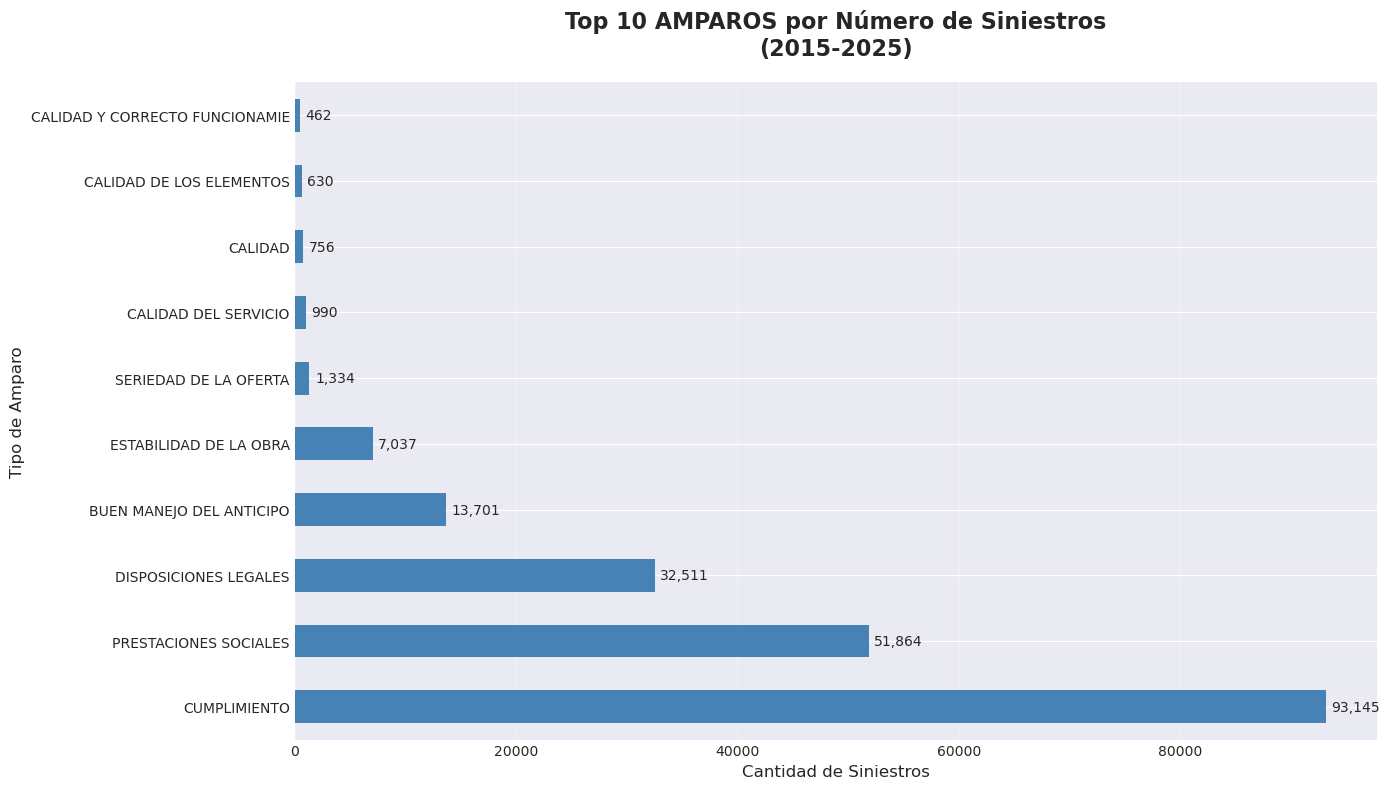

In [15]:
# 1. Top 10 AMPAROS por número de siniestros
fig, ax = plt.subplots(figsize=(14, 8))

top10_sinies = stats_amparo.nlargest(10, 'Num_Siniestros')['Num_Siniestros']
top10_sinies.plot(kind='barh', ax=ax, color='steelblue')

ax.set_title('Top 10 AMPAROS por Número de Siniestros\n(2015-2025)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Cantidad de Siniestros', fontsize=12)
ax.set_ylabel('Tipo de Amparo', fontsize=12)
ax.grid(axis='x', alpha=0.3)

for i, v in enumerate(top10_sinies):
    ax.text(v + 500, i, f'{int(v):,}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

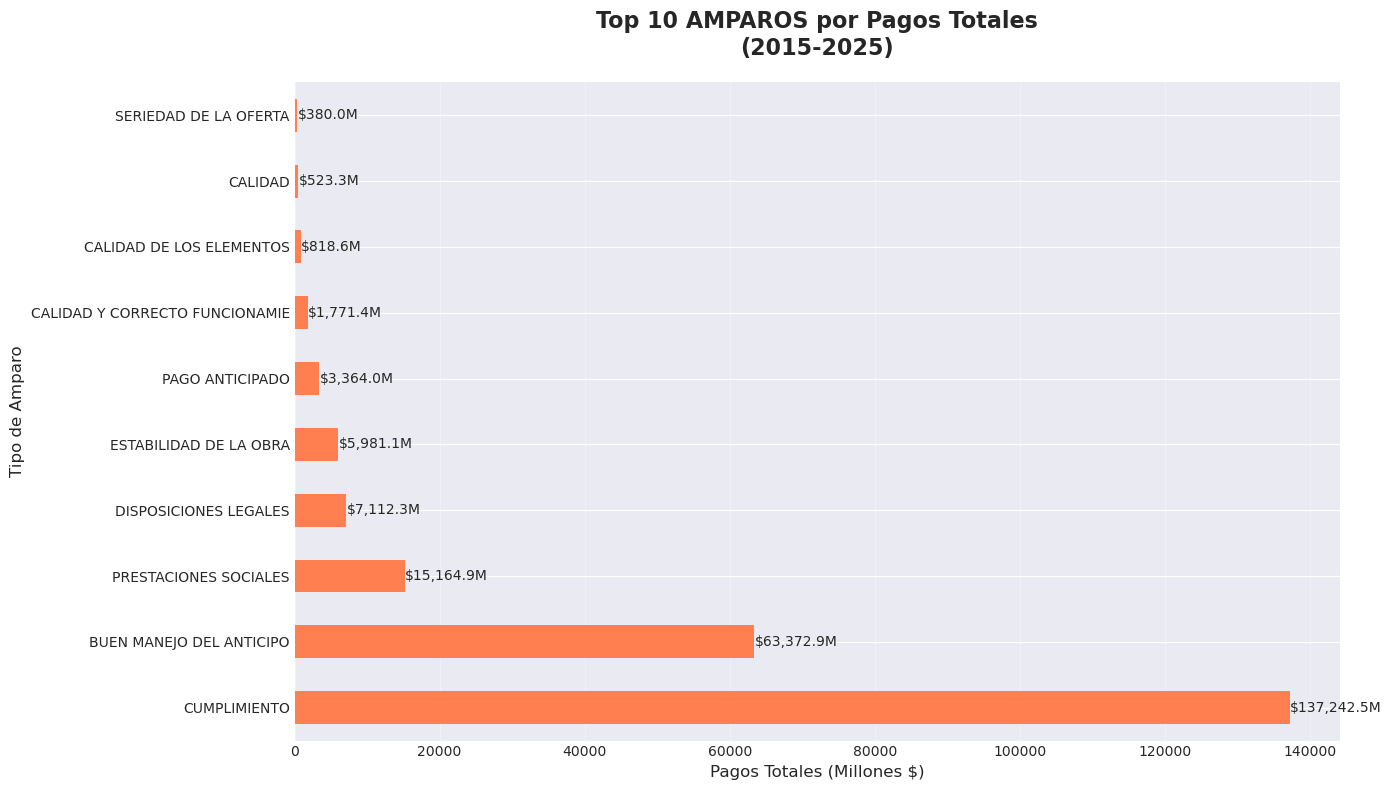

In [16]:
# 2. Distribución de pagos por AMPARO (Top 10)
fig, ax = plt.subplots(figsize=(14, 8))

top10_pagos = stats_amparo.nlargest(10, 'Pagos_Total')['Pagos_Total'] / 1_000_000  # En millones
top10_pagos.plot(kind='barh', ax=ax, color='coral')

ax.set_title('Top 10 AMPAROS por Pagos Totales\n(2015-2025)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Pagos Totales (Millones $)', fontsize=12)
ax.set_ylabel('Tipo de Amparo', fontsize=12)
ax.grid(axis='x', alpha=0.3)

for i, v in enumerate(top10_pagos):
    ax.text(v + 50, i, f'${v:,.1f}M', va='center', fontsize=10)

plt.tight_layout()
plt.show()

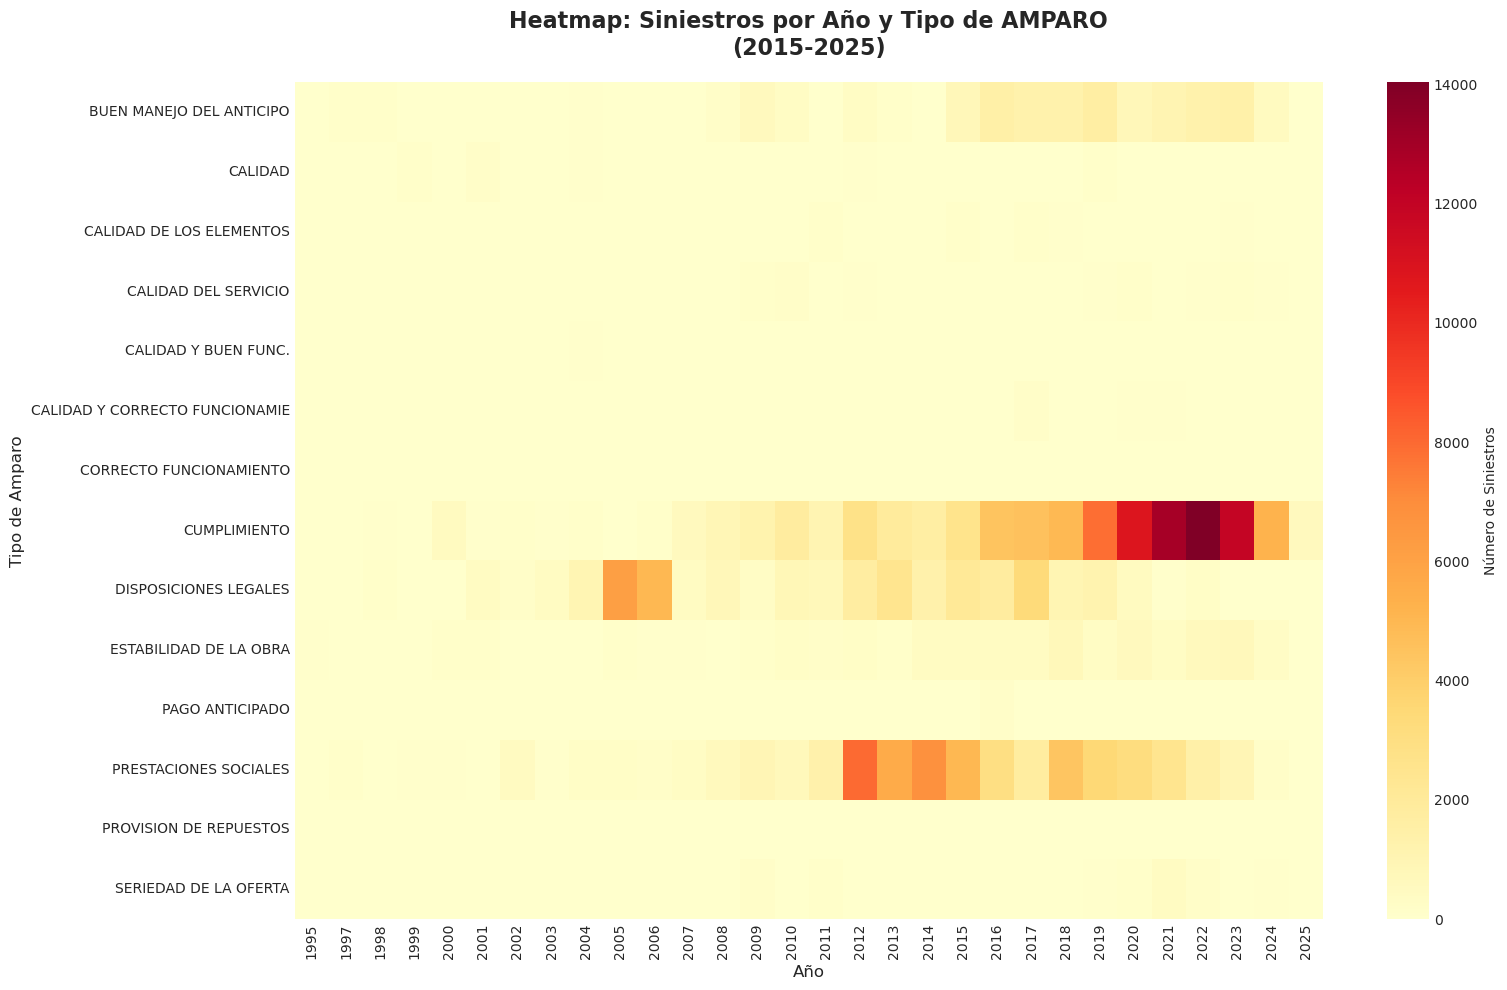

In [17]:
# 3. Heatmap de siniestros por año y AMPARO
fig, ax = plt.subplots(figsize=(16, 10))

# Preparar datos para heatmap
heatmap_data = df_sinies.groupby(['Año', 'AMPARO'])['SINIESTRO'].count().unstack(fill_value=0)

sns.heatmap(heatmap_data.T, cmap='YlOrRd', annot=False, fmt='d', 
            cbar_kws={'label': 'Número de Siniestros'}, ax=ax)

ax.set_title('Heatmap: Siniestros por Año y Tipo de AMPARO\n(2015-2025)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Año', fontsize=12)
ax.set_ylabel('Tipo de Amparo', fontsize=12)

plt.tight_layout()
plt.show()

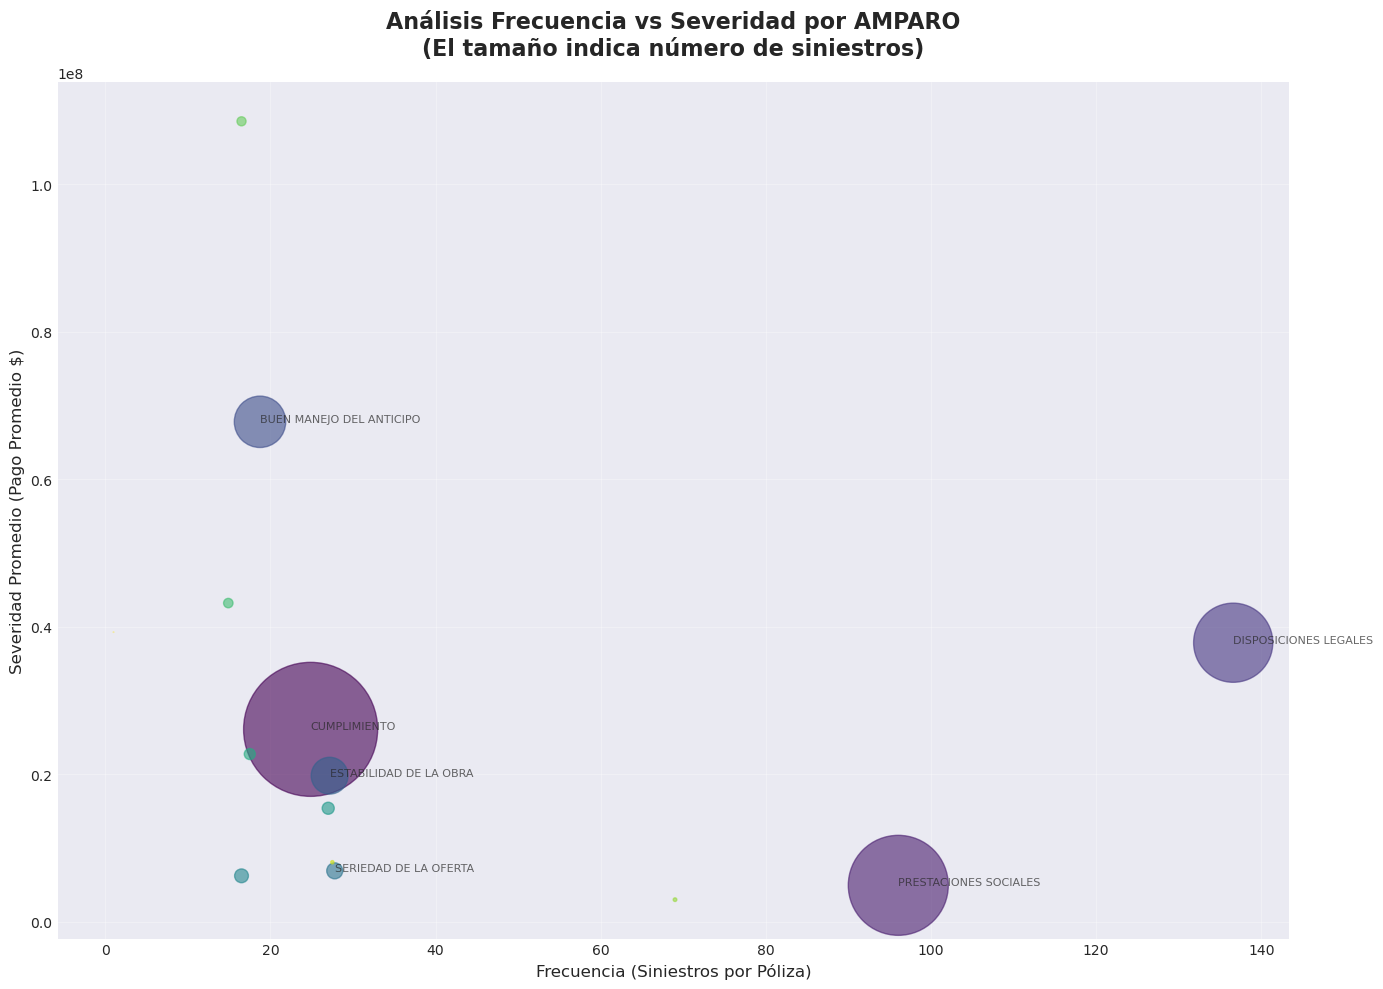

In [18]:
# 4. Severidad vs Frecuencia por AMPARO (Scatter plot)
fig, ax = plt.subplots(figsize=(14, 10))

# Preparar datos
scatter_data = metricas_sinies[[
    'Frecuencia_Sinies_x_Poliza', 'Severidad_Promedio', 'Num_Siniestros'
]].copy()

# Crear scatter plot
scatter = ax.scatter(
    scatter_data['Frecuencia_Sinies_x_Poliza'],
    scatter_data['Severidad_Promedio'],
    s=scatter_data['Num_Siniestros'] / 10,  # Tamaño proporcional al número de siniestros
    alpha=0.6,
    c=range(len(scatter_data)),
    cmap='viridis'
)

# Agregar etiquetas
for idx, amparo in enumerate(scatter_data.index):
    if scatter_data.iloc[idx]['Num_Siniestros'] > 1000:  # Solo etiquetar los más importantes
        ax.annotate(
            amparo,
            (scatter_data.iloc[idx]['Frecuencia_Sinies_x_Poliza'], 
             scatter_data.iloc[idx]['Severidad_Promedio']),
            fontsize=8,
            alpha=0.7
        )

ax.set_title('Análisis Frecuencia vs Severidad por AMPARO\n(El tamaño indica número de siniestros)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Frecuencia (Siniestros por Póliza)', fontsize=12)
ax.set_ylabel('Severidad Promedio (Pago Promedio $)', fontsize=12)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

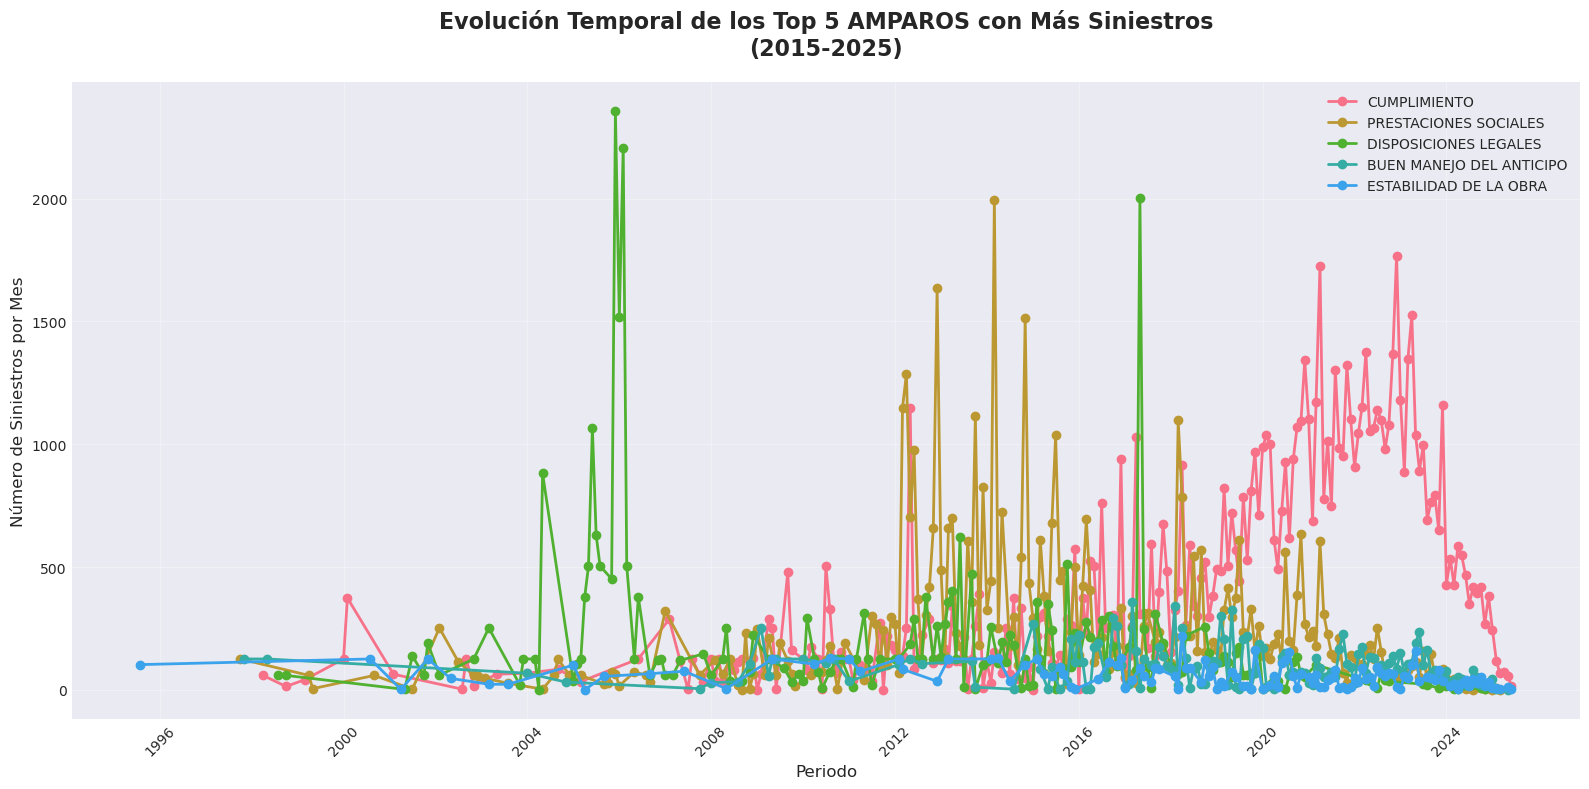

In [19]:
# 5. Evolución temporal de los Top 5 AMPAROS
fig, ax = plt.subplots(figsize=(16, 8))

# Identificar top 5 amparos
top5_amparos = stats_amparo.nlargest(5, 'Num_Siniestros').index.tolist()

# Filtrar datos
evol_top5 = evolucion_temporal[evolucion_temporal['AMPARO'].isin(top5_amparos)].copy()
evol_top5['Periodo_dt'] = evol_top5['Periodo'].dt.to_timestamp()

# Graficar líneas para cada amparo
for amparo in top5_amparos:
    data = evol_top5[evol_top5['AMPARO'] == amparo]
    ax.plot(data['Periodo_dt'], data['Num_Siniestros'], marker='o', label=amparo, linewidth=2)

ax.set_title('Evolución Temporal de los Top 5 AMPAROS con Más Siniestros\n(2015-2025)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Periodo', fontsize=12)
ax.set_ylabel('Número de Siniestros por Mes', fontsize=12)
ax.legend(loc='best', fontsize=10)
ax.grid(alpha=0.3)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

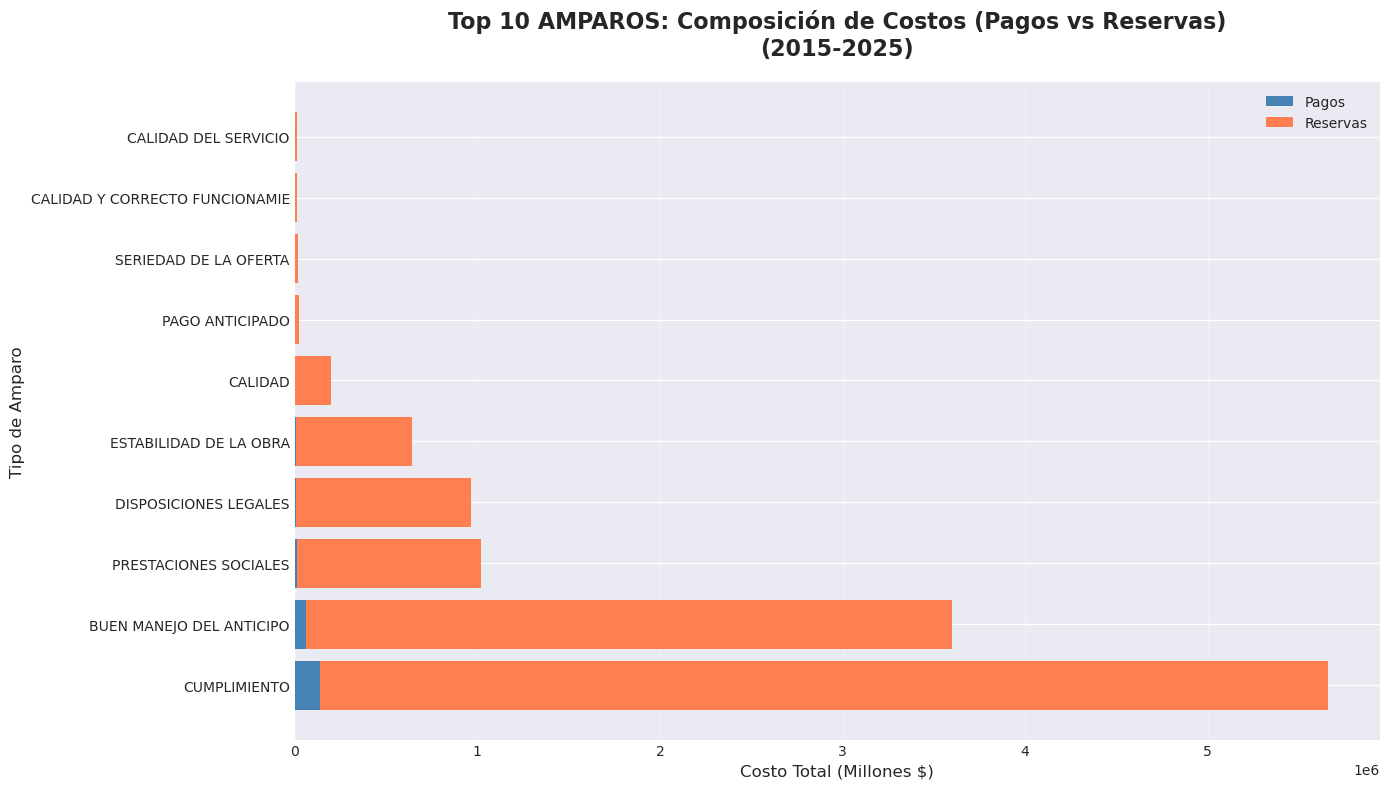

In [20]:
# 6. Composición de costos por AMPARO (Pagos vs Reservas)
fig, ax = plt.subplots(figsize=(14, 8))

# Top 10 amparos por costo total
top10_costo = metricas_sinies.nlargest(10, 'Costo_Total')

# Crear gráfico de barras apiladas
x = range(len(top10_costo))
pagos = top10_costo['Pagos_Total'] / 1_000_000
reservas = top10_costo['Reserva_Total'] / 1_000_000

ax.barh(x, pagos, label='Pagos', color='steelblue')
ax.barh(x, reservas, left=pagos, label='Reservas', color='coral')

ax.set_yticks(x)
ax.set_yticklabels(top10_costo.index)
ax.set_xlabel('Costo Total (Millones $)', fontsize=12)
ax.set_ylabel('Tipo de Amparo', fontsize=12)
ax.set_title('Top 10 AMPAROS: Composición de Costos (Pagos vs Reservas)\n(2015-2025)', 
             fontsize=16, fontweight='bold', pad=20)
ax.legend(loc='best')
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

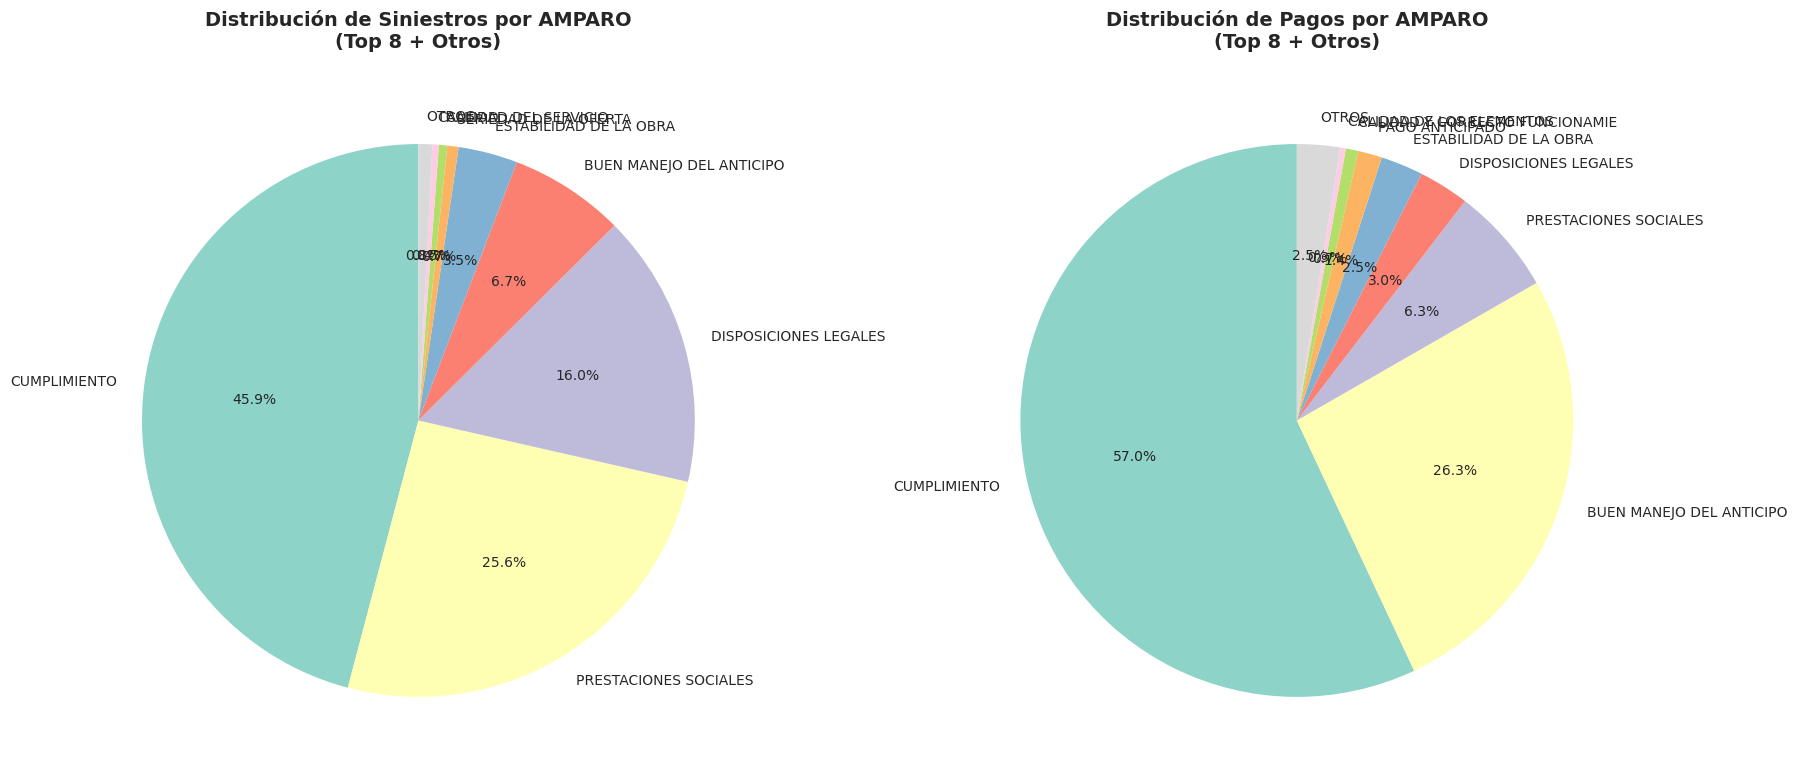

In [21]:
# 7. Gráfico de pastel: Distribución porcentual de siniestros por AMPARO
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Top 8 + Others
top8 = stats_amparo.nlargest(8, 'Num_Siniestros')['Num_Siniestros']
others = stats_amparo.iloc[8:]['Num_Siniestros'].sum()

# Preparar datos
pie_data = top8.copy()
pie_data['OTROS'] = others

# Gráfico 1: Por cantidad de siniestros
colors = plt.cm.Set3(range(len(pie_data)))
wedges, texts, autotexts = ax1.pie(
    pie_data.values,
    labels=pie_data.index,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90
)

ax1.set_title('Distribución de Siniestros por AMPARO\n(Top 8 + Otros)', 
              fontsize=14, fontweight='bold', pad=20)

# Gráfico 2: Por monto de pagos
top8_pagos = stats_amparo.nlargest(8, 'Pagos_Total')['Pagos_Total']
others_pagos = stats_amparo.iloc[8:]['Pagos_Total'].sum()
pie_pagos = top8_pagos.copy()
pie_pagos['OTROS'] = others_pagos

wedges2, texts2, autotexts2 = ax2.pie(
    pie_pagos.values,
    labels=pie_pagos.index,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90
)

ax2.set_title('Distribución de Pagos por AMPARO\n(Top 8 + Otros)', 
              fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

## Resumen Ejecutivo por AMPARO

In [22]:
print("="*80)
print("RESUMEN EJECUTIVO: ANÁLISIS POR AMPARO")
print("="*80)

print("\n📊 RANKING DE AMPAROS:")
print("-" * 80)

print("\n1. Por Número de Siniestros (Top 5):")
top5_num = stats_amparo.nlargest(5, 'Num_Siniestros')[['Num_Siniestros', '%_Siniestros']]
for idx, (amparo, row) in enumerate(top5_num.iterrows(), 1):
    print(f"   {idx}. {amparo}: {int(row['Num_Siniestros']):,} ({row['%_Siniestros']:.1f}%)")

print("\n2. Por Pagos Totales (Top 5):")
top5_pagos = stats_amparo.nlargest(5, 'Pagos_Total')[['Pagos_Total', '%_Pagos']]
for idx, (amparo, row) in enumerate(top5_pagos.iterrows(), 1):
    print(f"   {idx}. {amparo}: ${row['Pagos_Total']:,.0f} ({row['%_Pagos']:.1f}%)")

print("\n3. Por Costo Total - Pagos + Reservas (Top 5):")
top5_costo = metricas_sinies.nlargest(5, 'Costo_Total')[['Costo_Total', 'Pagos_Total', 'Reserva_Total']]
for idx, (amparo, row) in enumerate(top5_costo.iterrows(), 1):
    print(f"   {idx}. {amparo}: ${row['Costo_Total']:,.0f} (Pagos: ${row['Pagos_Total']:,.0f} + Reservas: ${row['Reserva_Total']:,.0f})")

print("\n4. Por Severidad (Ratio Pago/Asegurado) - Top 5:")
top5_sev = metricas_sinies.nlargest(5, 'Ratio_Pago_Asegurado_%')[['Ratio_Pago_Asegurado_%', 'Num_Siniestros']]
for idx, (amparo, row) in enumerate(top5_sev.iterrows(), 1):
    print(f"   {idx}. {amparo}: {row['Ratio_Pago_Asegurado_%']:.2f}% (n={int(row['Num_Siniestros']):,} siniestros)")

print("\n5. Por Frecuencia (Siniestros por Póliza) - Top 5:")
top5_freq = metricas_sinies.nlargest(5, 'Frecuencia_Sinies_x_Poliza')[['Frecuencia_Sinies_x_Poliza', 'Num_Siniestros', 'Polizas_Afectadas']]
for idx, (amparo, row) in enumerate(top5_freq.iterrows(), 1):
    print(f"   {idx}. {amparo}: {row['Frecuencia_Sinies_x_Poliza']:.2f} (Total: {int(row['Num_Siniestros']):,} sinies / {int(row['Polizas_Afectadas']):,} pólizas)")

print("\n\n💡 INSIGHTS CLAVE:")
print("-" * 80)

# Calcular algunos insights
total_siniestros = df_sinies['SINIESTRO'].nunique()
total_pagos = df_sinies['PAGOS'].sum()
siniestros_con_pago = (df_sinies['PAGOS'] > 0).sum()
pct_con_pago = siniestros_con_pago / len(df_sinies) * 100

print(f"\n• Total de siniestros analizados: {total_siniestros:,}")
print(f"• Total de pagos realizados: ${total_pagos:,.2f}")
print(f"• Siniestros con pago > 0: {siniestros_con_pago:,} ({pct_con_pago:.1f}%)")
print(f"• Periodo analizado: {df_sinies['Año'].min()}-{df_sinies['Año'].max()} ({df_sinies['Año'].nunique()} años)")
print(f"• Tipos de AMPARO: {df_sinies['AMPARO'].nunique()}")
print(f"• Departamentos afectados: {df_sinies['COD_DEPTO'].nunique()}")

print("\n" + "="*80)

RESUMEN EJECUTIVO: ANÁLISIS POR AMPARO

📊 RANKING DE AMPAROS:
--------------------------------------------------------------------------------

1. Por Número de Siniestros (Top 5):
   1. CUMPLIMIENTO: 93,145 (45.9%)
   2. PRESTACIONES SOCIALES: 51,864 (25.6%)
   3. DISPOSICIONES LEGALES: 32,511 (16.0%)
   4. BUEN MANEJO DEL ANTICIPO: 13,701 (6.8%)
   5. ESTABILIDAD DE LA OBRA: 7,037 (3.5%)

2. Por Pagos Totales (Top 5):
   1. CUMPLIMIENTO: $137,242,463,687 (58.1%)
   2. BUEN MANEJO DEL ANTICIPO: $63,372,943,558 (26.8%)
   3. PRESTACIONES SOCIALES: $15,164,863,750 (6.4%)
   4. DISPOSICIONES LEGALES: $7,112,298,210 (3.0%)
   5. ESTABILIDAD DE LA OBRA: $5,981,120,690 (2.5%)

3. Por Costo Total - Pagos + Reservas (Top 5):
   1. CUMPLIMIENTO: $5,659,502,221,750 (Pagos: $137,242,463,687 + Reservas: $5,522,259,758,062)
   2. BUEN MANEJO DEL ANTICIPO: $3,596,539,968,998 (Pagos: $63,372,943,558 + Reservas: $3,533,167,025,440)
   3. PRESTACIONES SOCIALES: $1,020,530,586,230 (Pagos: $15,164,863,7

In [23]:
# Exportar resultados (opcional)
# stats_amparo.to_csv('../estadisticas_por_amparo.csv')
# metricas_sinies.to_csv('../metricas_siniestralidad_por_amparo.csv')
# print("✓ Estadísticas exportadas a CSV")